<a href="https://colab.research.google.com/github/IbrahemAmar/Data-mining-and-Machine-Learning-/blob/main/lab8_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import random
import numpy as np

# Import dataset and classifiers
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

In [2]:
# Plot  image samples
def plotSamples(data,rows,cols,trueLabels,predictedLabels=[]):
    fig, axs = plt.subplots(rows,cols)
    nDigits = data.shape[0]
    for i in range(rows):
        for j in range(cols):
            index = random.randint(0,nDigits-1)
            axs[i,j].imshow(data[index].reshape(8,8),cmap = 'gray')
            # remove axes titles
            axs[i,j].axis('off')
            if (np.any(predictedLabels)):
                axs[i,j].set_title('Predct: %i,  Real %i' % (predictedLabels[index], trueLabels[index]) ,fontdict={'fontsize': 10})
            else:
                axs[i,j].set_title('Real: %i' % trueLabels[index],fontdict={'fontsize': 10})
            # show the figure
    plt.show()

In [3]:
# The digits dataset consisits of 8x8 images of digits
digits = datasets.load_digits()
data = digits.data
trueLabels = digits.target

In [4]:

#rng = np.random.default_rng()

#for i in range(data.shape[0]):
#    k = rng.integers(0, 9)              # 0..8 pixels
#    if k == 0:
#        continue
#    idx = rng.choice(64, size=k, replace=False)
#    data[i, idx] = 15 - data[i, idx]    # invert in-place (0..15)

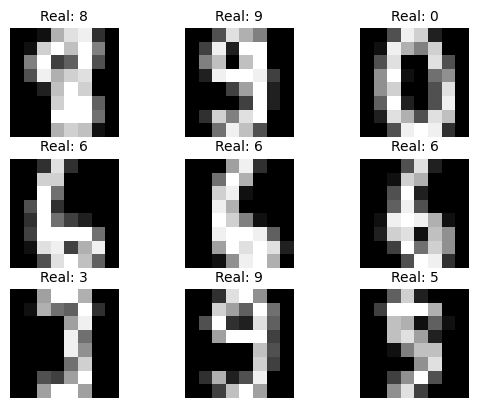

In [5]:
rows = 3
cols = 3
plotSamples(data,rows,cols,trueLabels)

In [6]:
# Split data into train and test subsets
trainData, testData, trainLabels, testLabels = train_test_split(
    data, trueLabels, train_size= 0.5,stratify=trueLabels)

In [7]:
# Train a support vector classifier and predict the test set
classifier = svm.SVC(kernel='rbf', gamma='scale')
classifier.fit(trainData, trainLabels)
predictedLabels = classifier.predict(testData)

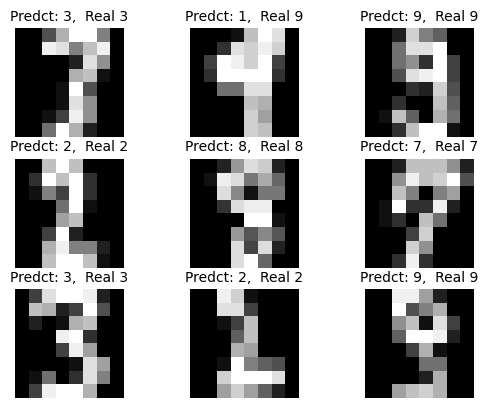

In [8]:
plotSamples(testData,rows,cols,testLabels,predictedLabels)

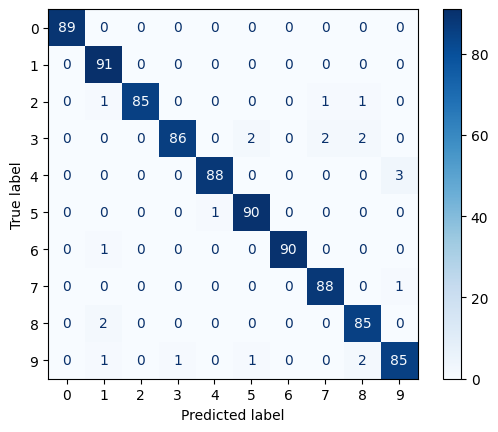


Error percentage per digit:
Digit 0: 0.00%
Digit 1: 0.00%
Digit 2: 3.41%
Digit 3: 6.52%
Digit 4: 3.30%
Digit 5: 1.10%
Digit 6: 1.10%
Digit 7: 1.12%
Digit 8: 2.30%
Digit 9: 5.56%


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(testLabels, predictedLabels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

# Error percentage per digit
row_totals = cm.sum(axis=1)
correct = np.diag(cm)
error_pct = (1 - correct / row_totals) * 100

print("\nError percentage per digit:")
for d in range(10):
    print(f"Digit {d}: {error_pct[d]:.2f}%")


In [10]:
def plot_digit_result(digit, correct=True):
    # assumes you already have: testData, testLabels, predictedLabels

    digit = int(digit)
    correct = bool(correct)

    idx_found = None
    for i in range(len(testLabels)):
        if testLabels[i] == digit:
            if correct and predictedLabels[i] == digit:
                idx_found = i
                break
            if (not correct) and predictedLabels[i] != digit:
                idx_found = i
                break

    plt.figure()
    if idx_found is None:
        # nothing found: plot any example of the true digit (if exists), and title P=N
        any_idx = None
        for i in range(len(testLabels)):
            if testLabels[i] == digit:
                any_idx = i
                break

        if any_idx is None:
            plt.title("P=N")
            plt.axis("off")
            plt.show()
            return

        plt.imshow(testData[any_idx].reshape(8, 8), cmap="gray")
        plt.title("P=N")
    else:
        plt.imshow(testData[idx_found].reshape(8, 8), cmap="gray")
        plt.title(f"T={testLabels[idx_found]}, P={predictedLabels[idx_found]}")

    plt.axis("off")
    plt.show()


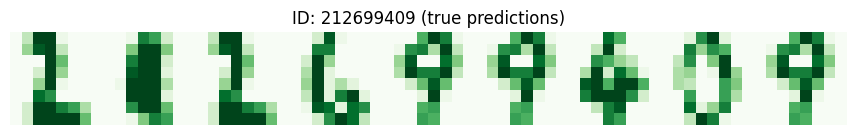

In [11]:
id_str = "212699409"

imgs = []
for ch in id_str:
    d = int(ch)
    idx = None
    for i in range(len(testLabels)):
        if testLabels[i] == d and predictedLabels[i] == d:  # true prediction
            idx = i
            break

    if idx is None:
        imgs.append(np.zeros((8,8)))          # if not found, put empty digit
    else:
        imgs.append(testData[idx].reshape(8,8))

line_img = np.hstack(imgs)  # concatenate all digits in one line

plt.figure(figsize=(len(id_str)*1.2, 2))
plt.imshow(line_img, cmap="Greens", vmin=0, vmax=15)
plt.axis("off")
plt.title(f"ID: {id_str} (true predictions)")
plt.show()


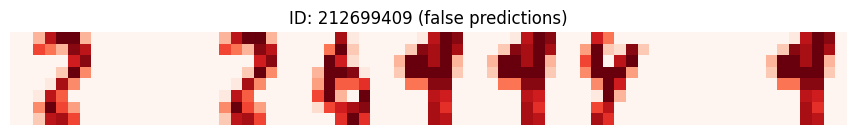

In [12]:
id_str = "212699409"

imgs = []
for ch in id_str:
    d = int(ch)
    idx = None
    for i in range(len(testLabels)):
        if testLabels[i] == d and predictedLabels[i] != d:  # false prediction for this true digit
            idx = i
            break

    if idx is None:
        imgs.append(np.zeros((8,8)))          # if not found, put empty digit
    else:
        imgs.append(testData[idx].reshape(8,8))

line_img = np.hstack(imgs)

plt.figure(figsize=(len(id_str)*1.2, 2))
plt.imshow(line_img, cmap="Reds", vmin=0, vmax=15)
plt.axis("off")
plt.title(f"ID: {id_str} (false predictions)")
plt.show()
